<a href="https://colab.research.google.com/github/ammtjm/Stock_Data_Analysis/blob/main/creativehack%E5%90%91%E3%81%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the uploaded CSV file
file_path = 'pivoted_sector_market_cap_proportion.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Date,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
0,2009-01-02,0.094863,0.048110,0.117093,0.109479,0.170623,0.128196,0.098048,0.112241,0.030389,0.031054,0.059905
1,2009-01-05,0.094704,0.048889,0.117117,0.111225,0.167739,0.127579,0.097707,0.113260,0.030652,0.030698,0.060428
2,2009-01-06,0.095339,0.049051,0.115015,0.110466,0.169981,0.124627,0.098458,0.114724,0.031117,0.031947,0.059274
3,2009-01-07,0.096220,0.048747,0.117191,0.109804,0.166972,0.127137,0.097808,0.113625,0.030457,0.031730,0.060308
4,2009-01-08,0.096943,0.048679,0.114727,0.110568,0.166285,0.127305,0.098162,0.114491,0.031115,0.031335,0.060388


<ipython-input-3-39f2d199c1cd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Sector Pair': f'{sector1}/{sector2}', 'Correlation': correlation}, ignore_index=True)
<ipython-input-3-39f2d199c1cd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Sector Pair': f'{sector1}/{sector2}', 'Correlation': correlation}, ignore_index=True)
<ipython-input-3-39f2d199c1cd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Sector Pair': f'{sector1}/{sector2}', 'Correlation': correlation}, ignore_index=True)
<ipython-input-3-39f2d199c1cd>:18: FutureWarning: The frame.append method is deprecated and will be removed f

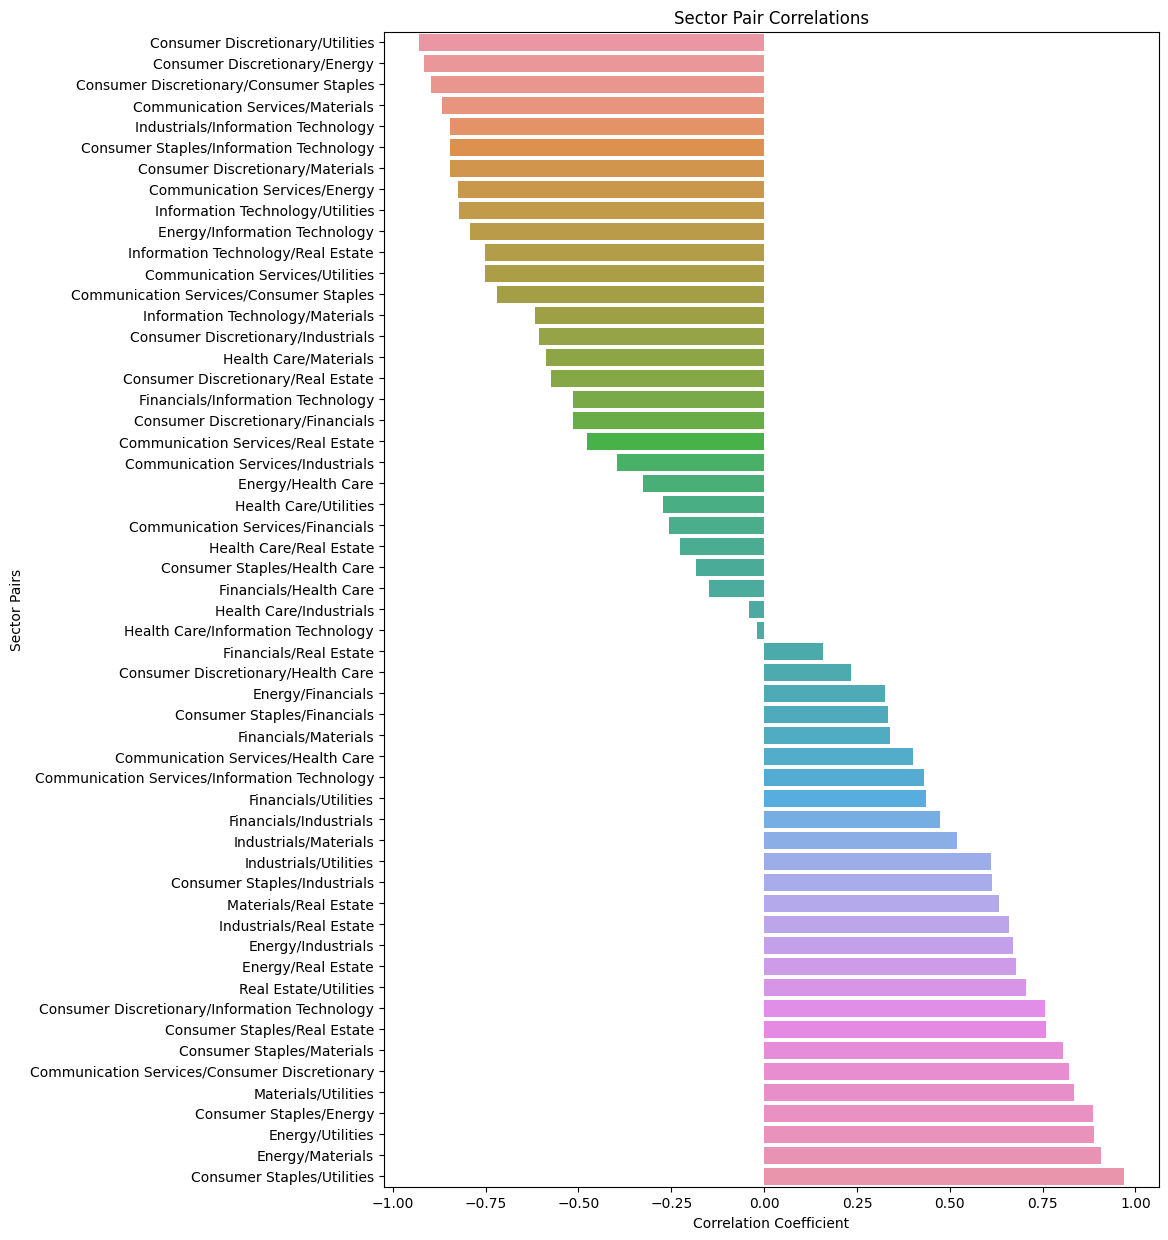

In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of sectors (exclude the 'Date' column)
sectors = df.columns[1:].tolist()

# Generate all possible sector pairs (11C2 = 55 pairs)
sector_pairs = list(itertools.combinations(sectors, 2))

# Initialize an empty DataFrame to store correlation values
correlation_df = pd.DataFrame(columns=['Sector Pair', 'Correlation'])

# Calculate the correlation for each sector pair
for pair in sector_pairs:
    sector1, sector2 = pair
    correlation = df[sector1].corr(df[sector2])
    correlation_df = correlation_df.append({'Sector Pair': f'{sector1}/{sector2}', 'Correlation': correlation}, ignore_index=True)

# Sort the DataFrame by correlation values
correlation_df = correlation_df.sort_values(by='Correlation')

# Plot the correlations
plt.figure(figsize=(10, 15))
sns.barplot(data=correlation_df, y='Sector Pair', x='Correlation')
plt.title('Sector Pair Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sector Pairs')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Read the data (assuming the DataFrame is named 'df')
# df = pd.read_csv('your_file.csv')

# Convert 'Date' to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'])

# Create the plot
fig = px.line(df, x='Date', y=df.columns[1:],
              title='Time Series of Sector Market Cap Proportion',
              labels={'value': 'Market Cap Proportion', 'Date': 'Date'},
              line_shape='linear')

# Show the plot
fig.show()


In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of sectors (exclude the 'Date' column)
sectors = df.columns[1:].tolist()

# Generate all possible sector pairs (11C2 = 55 pairs)
sector_pairs = list(itertools.combinations(sectors, 2))

# Initialize an empty DataFrame to store correlation values
correlation_df = pd.DataFrame(columns=['Sector Pair', 'Correlation'])

# Calculate the correlation for each sector pair
for pair in sector_pairs:
    sector1, sector2 = pair
    correlation = df[sector1].corr(df[sector2])
    correlation_df = correlation_df.append({'Sector Pair': f'{sector1}/{sector2}', 'Correlation': correlation}, ignore_index=True)

# Show the calculated correlation DataFrame
correlation_df.sort_values(by='Correlation', ascending=False).head()


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Resample data to monthly frequency, taking the last observation of each month
df_monthly = df.resample('M', on='Date').last()

# Initialize an empty DataFrame to store cointegration test p-values
cointegration_df = pd.DataFrame(columns=['Sector Pair', 'P-value'])

# Perform cointegration tests for each sector pair
for pair in sector_pairs:
    sector1, sector2 = pair
    y0 = df_monthly[sector1]
    y1 = df_monthly[sector2]

    # Perform the cointegration test
    _, p_value, _ = coint(y0, y1)

    # Append the results to the DataFrame
    cointegration_df = cointegration_df.append({'Sector Pair': f'{sector1}/{sector2}', 'P-value': p_value}, ignore_index=True)

# Sort the DataFrame by p-value (ascending)
cointegration_df_sorted = cointegration_df.sort_values(by='P-value').reset_index(drop=True)

# Show the top 5 pairs with the lowest p-values (indicating strong cointegration)
top_5_cointegrated_pairs = cointegration_df_sorted.head(5)
top_5_cointegrated_pairs


In [ ]:
import numpy as np

# Initialize a new DataFrame to store trading flags for the top 5 cointegrated pairs
flags_df = df[['Date']].copy()

# Calculate the trading flags
for index, row in top_5_cointegrated_pairs.iterrows():
    sector_pair = row['Sector Pair']
    sector1, sector2 = sector_pair.split('/')

    # Calculate the deviation rate
    diff = df[sector1] - df[sector2]
    mean_diff = diff.mean()
    std_diff = diff.std()

    # Calculate the upper and lower bounds for trading (mean ± 2σ)
    upper_bound = mean_diff + 2 * std_diff
    lower_bound = mean_diff - 2 * std_diff

    # Create the trading flags
    flag_column = f'Flag_{sector_pair}'
    flags_df[flag_column] = np.where(diff > upper_bound, 'Sell', np.where(diff < lower_bound, 'Buy', 'Hold'))

# Show some rows of the trading flags DataFrame
flags_df.head()


,Date,Flag_Consumer Staples/Utilities,Flag_Real Estate/Utilities,Flag_Consumer Discretionary/Materials,Flag_Consumer Staples/Real Estate,Flag_Communication Services/Materials
0,2009-01-02,Hold,Buy,Hold,Sell,Hold
1,2009-01-05,Hold,Buy,Hold,Sell,Hold
2,2009-01-06,Hold,Buy,Hold,Sell,Hold
3,2009-01-07,Hold,Buy,Hold,Sell,Hold
4,2009-01-08,Hold,Buy,Hold,Sell,Hold


In [ ]:
# Load the uploaded SP500 market cap data

sp500_file_paths = 'sp500market_cap (2).csv'

sp500_df = pd.read_csv(sp500_file_paths)



# Convert 'Date' column to datetime format

sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])



# Show the first few rows of the DataFrame

sp500_df.head()


,Date,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2009-01-02,2.094963e+10,5.998299e+08,3.177032e+10,NaN,1.615283e+10,6.293798e+09,1.079131e+10,1.049252e+10,1.020682e+10,...,5.072746e+09,3.098185e+09,3.321457e+09,6.230414e+09,NaN,4.825870e+09,1.079647e+09,7.691981e+09,2.962243e+09,NaN
1,2009-01-05,2.070541e+10,5.970305e+08,3.122460e+10,NaN,1.622479e+10,6.038458e+09,1.075065e+10,1.054265e+10,1.010326e+10,...,5.002403e+09,3.029755e+09,3.663267e+09,6.170887e+09,NaN,4.957075e+09,1.064758e+09,7.533573e+09,2.882855e+09,NaN
2,2009-01-06,2.094963e+10,6.166249e+08,3.020435e+10,NaN,1.602330e+10,5.645095e+09,1.045859e+10,1.103948e+10,1.030785e+10,...,5.213432e+09,3.018223e+09,3.871997e+09,6.091520e+09,NaN,4.948027e+09,1.091454e+09,7.673561e+09,2.980017e+09,NaN
3,2009-01-07,2.055322e+10,6.118260e+08,3.003826e+10,NaN,1.620560e+10,6.266194e+09,1.047708e+10,1.104403e+10,1.013104e+10,...,5.205393e+09,2.979393e+09,3.308148e+09,6.028686e+09,NaN,4.771582e+09,1.092481e+09,7.424898e+09,2.675499e+09,NaN
4,2009-01-08,2.073373e+10,6.176249e+08,3.037043e+10,NaN,1.604249e+10,6.390413e+09,1.026266e+10,1.107138e+10,1.025733e+10,...,5.251619e+09,2.977088e+09,3.253515e+09,6.108055e+09,NaN,4.748960e+09,1.059111e+09,7.623829e+09,2.630472e+09,NaN


#ここから下を実行

In [ ]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import numpy as np

# Read the uploaded CSV files
file_path = 'pivoted_sector_market_cap_proportion.csv'
df = pd.read_csv(file_path)

sp500_file_path = 'sp500market_cap (2).csv'
sp500_df = pd.read_csv(sp500_file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

# Display the first few rows of the DataFrames
print("DataFrame - pivoted_sector_market_cap_proportion:")
print(df.head())
print("DataFrame - sp500market_cap:")
print(sp500_df.head())

# Get the list of sectors (exclude the 'Date' column)
sectors = df.columns[1:].tolist()

# Generate all possible sector pairs
sector_pairs = list(itertools.combinations(sectors, 2))

# Initialize an empty DataFrame to store correlation values
correlation_df = pd.DataFrame(columns=['Sector Pair', 'Correlation'])

# Calculate the correlation for each sector pair
for pair in sector_pairs:
    sector1, sector2 = pair
    correlation = df[sector1].corr(df[sector2])
    correlation_df = correlation_df.append({'Sector Pair': f'{sector1}/{sector2}', 'Correlation': correlation}, ignore_index=True)

# Sort the DataFrame by correlation values and display the top correlations
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
print("Top Sector Pair Correlations:")
print(correlation_df.head())

# Plot the correlations
plt.figure(figsize=(10, 15))
sns.barplot(data=correlation_df, y='Sector Pair', x='Correlation')
plt.title('Sector Pair Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sector Pairs')
plt.show()

# Create the time series plot of sector market cap proportion
fig = px.line(df, x='Date', y=df.columns[1:],
              title='Time Series of Sector Market Cap Proportion',
              labels={'value': 'Market Cap Proportion', 'Date': 'Date'},
              line_shape='linear')
fig.show()

# Resample data to monthly frequency, taking the last observation of each month
df_monthly = df.resample('M', on='Date').last()

# Initialize an empty DataFrame to store cointegration test p-values
cointegration_df = pd.DataFrame(columns=['Sector Pair', 'P-value'])

# Perform cointegration tests for each sector pair
for pair in sector_pairs:
    sector1, sector2 = pair
    y0 = df_monthly[sector1]
    y1 = df_monthly[sector2]

    # Perform the cointegration test
    _, p_value, _ = coint(y0, y1)

    # Append the results to the DataFrame
    cointegration_df = cointegration_df.append({'Sector Pair': f'{sector1}/{sector2}', 'P-value': p_value}, ignore_index=True)

# Sort the DataFrame by p-value (ascending) and display the top 5 cointegrated pairs
cointegration_df_sorted = cointegration_df.sort_values(by='P-value').reset_index(drop=True)
top_5_cointegrated_pairs = cointegration_df_sorted.head(5)
print("Top 5 Cointegrated Pairs:")
print(top_5_cointegrated_pairs)

# Initialize a new DataFrame to store trading flags for the top 5 cointegrated pairs
flags_df = df[['Date']].copy()

# Calculate the trading flags
for index, row in top_5_cointegrated_pairs.iterrows():
    sector_pair = row['Sector Pair']
    sector1, sector2 = sector_pair.split('/')

    # Calculate the deviation rate
    diff = df[sector1] - df[sector2]
    mean_diff = diff.mean()
    std_diff = diff.std()

    # Calculate the upper and lower bounds for trading (mean ± 2σ)
    upper_bound = mean_diff + 2 * std_diff
    lower_bound = mean_diff - 2 * std_diff

    # Create the trading flags
    flag_column = f'Flag_{sector_pair}'
    flags_df[flag_column] = np.where(diff > upper_bound, 'Sell', np.where(diff < lower_bound, 'Buy', 'Hold'))

# Show some rows of the trading flags DataFrame
print("Trading Flags DataFrame:")
print(flags_df.head())


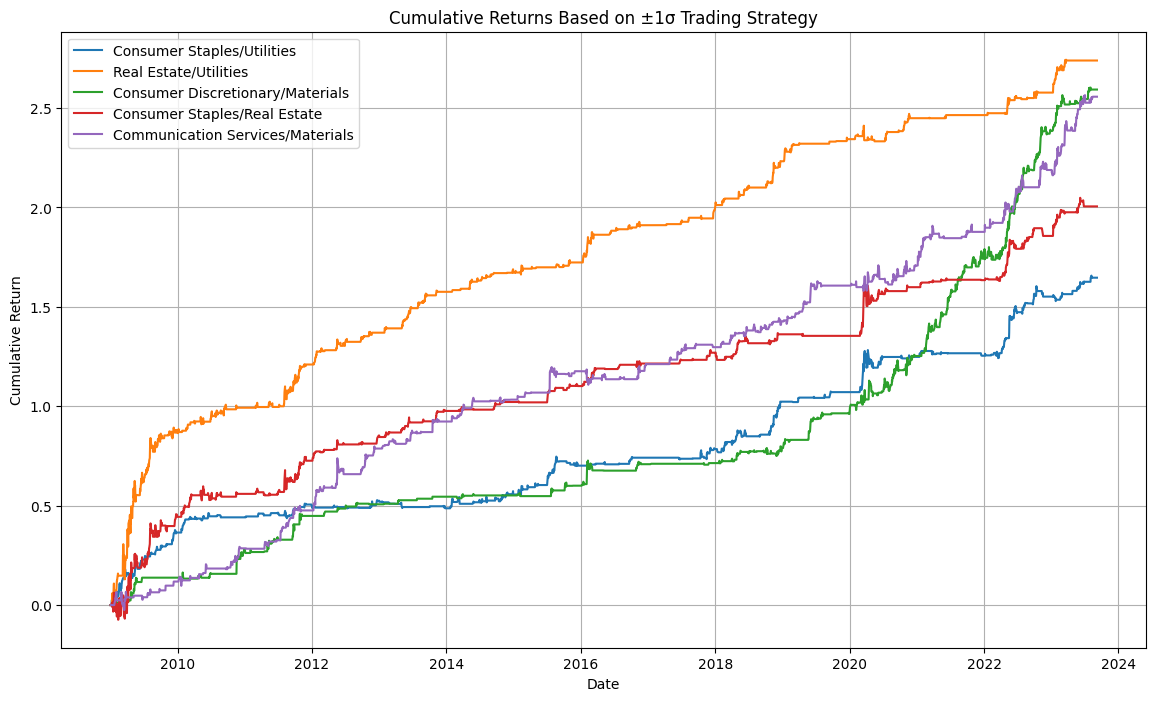

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df, daily_returns, top_5_cointegrated_pairs, and macd_df are already defined

# Initialize a DataFrame to store the cumulative returns based on the ±1σ trading strategy
cumulative_returns_1sigma = pd.DataFrame(index=df['Date'], columns=top_5_cointegrated_pairs['Sector Pair'])

# Calculate the cumulative returns based on the ±1σ strategy
for idx, sector_pair in enumerate(top_5_cointegrated_pairs['Sector Pair']):
    sector1, sector2 = sector_pair.split('/')
    flag_column = f'Flag_MACD_{sector_pair}'

    # Initialize the cumulative return columns to zero
    cumulative_returns_1sigma[sector_pair] = 0.0

    # Initialize variables to keep track of the cumulative return and current position
    cum_return1 = 0.0
    cum_return2 = 0.0
    position = 'None'  # None, Buy, or Sell

    # Calculate the mean and standard deviation of MACD difference for the ±1σ strategy
    macd_diff_all = macd_df[sector1] - macd_df[sector2]
    mean_diff = macd_diff_all.mean()
    std_diff = macd_diff_all.std()
    upper_bound = mean_diff + std_diff  # +1σ
    lower_bound = mean_diff - std_diff  # -1σ

    for date, flag in flags_macd_df[['Date', flag_column]].itertuples(index=False):
        macd_diff = macd_df.loc[macd_df.index == date, sector1].values[0] - macd_df.loc[macd_df.index == date, sector2].values[0]
        return1 = daily_returns.loc[daily_returns.index == date, sector1].values[0]
        return2 = daily_returns.loc[daily_returns.index == date, sector2].values[0]

        # Close the position if MACD diff is close to zero
        if np.abs(macd_diff) < 0.01:
            position = 'None'

        # Open/Keep position based on the flag and the ±1σ criteria
        if macd_diff > upper_bound:
            position = 'Sell'
        elif macd_diff < lower_bound:
            position = 'Buy'

        # Update the cumulative return based on the current position
        if position == 'Buy':
            cum_return1 -= return1  # Sell sector1
            cum_return2 += return2  # Buy sector2
        elif position == 'Sell':
            cum_return1 += return1  # Buy sector1
            cum_return2 -= return2  # Sell sector2

        # Calculate the total cumulative return for the pair
        cumulative_returns_1sigma.loc[date, sector_pair] = cum_return1 + cum_return2

# Plot the cumulative returns based on the ±1σ strategy
plt.figure(figsize=(14, 8))
for idx, col in enumerate(cumulative_returns_1sigma.columns):
    plt.plot(cumulative_returns_1sigma.index, cumulative_returns_1sigma[col], label=col)

plt.title('Cumulative Returns Based on ±1σ Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import plotly.graph_objs as go
from dash.dependencies import Input, Output
import numpy as np
import pandas as pd

# 仮定: normalized_returns と df は既に定義されている
# Set the baseline date and filter the DataFrame
baseline_date = '2019-10-08'
filtered_df = cumulative_returns_1sigma[cumulative_returns_1sigma.index >= baseline_date]

# Normalize the cumulative returns to start from 0
normalized_returns = filtered_df - filtered_df.loc[baseline_date]
# 基準日を設定し、累積リターンを1からスタートするように調整
baseline_date = '2019-10-08'
normalized_returns = normalized_returns + 1

# 関数の定義
# ... (他の関数定義は省略)

# Max Drawdown の計算
def calculate_max_drawdown(history):
    max_drawdown = 0
    peak = history[0]
    for x in history:
        if x > peak:
            peak = x
        if peak == 0:
            continue  # 0除算を避けるためにスキップ
        drawdown = (peak - x) / peak
        if drawdown > max_drawdown:
            max_drawdown = drawdown
    return max_drawdown

# 各セクターペアに対してメトリクスを計算し、データフレームを作成
metrics_data = {}
for col in normalized_returns.columns:
    history = normalized_returns[col].tolist()
    metrics_data[col] = {
        'Max Drawdown': calculate_max_drawdown(history),
        'Drawdown Duration': calculate_drawdown_duration(history),
        'Sharpe Ratio': calculate_sharpe_ratio(history),
        'Final Profit': calculate_final_profit(history),
    }
metrics_df = pd.DataFrame(metrics_data).T.reset_index().rename(columns={'index': 'Strategy'})

# アプリケーションのレイアウトを定義
app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Tabs(id="tabs", value='tab1', children=[
        dcc.Tab(label='Metrics', value='tab1'),
        dcc.Tab(label='Cumulative Returns', value='tab2'),
    ]),
    html.Div(id='tabs-content')
])

# 選択されたタブに基づいてコンテンツを更新するコールバックを定義
@app.callback(Output('tabs-content', 'children'),
              [Input('tabs', 'value')])
def update_tab(tab_name):
    if tab_name == 'tab1':
        return html.Div([
            html.H4('Trading Strategy Metrics'),
            dash_table.DataTable(
                id='table',
                columns=[{"name": i, "id": i} for i in metrics_df.columns],
                data=metrics_df.to_dict('records'),
            )
        ])
    elif tab_name == 'tab2':
        traces = [go.Scatter(x=normalized_returns.index, y=normalized_returns[col], mode='lines', name=col) for col in normalized_returns.columns]
        layout = go.Layout(title='Cumulative Returns Based on ±1σ Trading Strategy', xaxis=dict(title='Date'), yaxis=dict(title='Cumulative Return'))
        return dcc.Graph(id='graph', figure={'data': traces, 'layout': layout})

# アプリケーションを実行
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>